In [83]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


In [84]:
xl = pd.ExcelFile('20190927_HeartSurvey_edited.xlsx')
survey = xl.parse("Sheet1")
survey.head()

,Duration (in seconds),RecordedDate,ResponseId,Q2.1,Q2.2,Q2.3,Q4.2_1,Q4.3,Q5.2_1,Q5.3,...,Q69.1_2,Q69.1_3,Q69.1_4,Q69.1_5,Q69.1_6,Q69.1_7,Q69.1_8,Q69.1_9,Q69.1_10,Q69.2_1
0,10106,2019-09-11 16:40:00,R_32XStqqXgBnksiC,Physician,20-24 years,20-24 years,0,Yes,100,No,...,NaN,NaN,Number 3,Number 2,NaN,NaN,NaN,Number 4,Number 1,Highly Risk Tolerant
1,4925,2019-09-11 16:40:00,R_2bTotYExBytoNpf,Physician,0-4 years,0-4 years,9,Yes,49,No,...,NaN,NaN,NaN,Number 4,Number 2,Number 1,NaN,NaN,Number 3,Neutral
2,10386,2019-09-11 16:40:00,R_28HubDeTQcBnH6b,Physician,0-4 years,0-4 years,0,Yes,100,No,...,NaN,Number 2,NaN,Number 3,NaN,NaN,NaN,Number 4,Number 5,Neutral
3,10243,2019-09-11 16:40:00,R_3rZnt5JFNJxWU8U,Physician,5-9 years,5-9 years,10,Yes,100,No,...,NaN,Number 5,Number 4,Number 3,NaN,NaN,NaN,NaN,Number 2,Neutral
4,10723,2019-09-11 16:41:00,R_8CzCYLAwaFnUdcR,Physician,20-24 years,20-24 years,8,Yes,99,No,...,NaN,NaN,Number 3,Number 4,NaN,Number 5,NaN,NaN,Number 2,Somewhat Risk Averse


In [85]:
## Extract risk data to its own dataframe

risk = survey.iloc[:, 10:130:2].fillna(50) ## All the actual questions, risk value
risk.head()

,Q7.2_1,Q8.2_1,Q9.2_1,Q10.2_1,Q11.2_1,Q12.2_1,Q13.2_1,Q14.2_1,Q15.2_1,Q16.2_1,...,Q58.2_1,Q59.2_1,Q60.2_1,Q61.2_1,Q62.2_1,Q63.2_1,Q64.2_1,Q65.2_1,Q66.2_1,Q67.2_1
0,50.0,92,63.0,0,100.0,40.0,100,0,71,97.0,...,89,40.0,100,100,77,66.0,84,15,70.0,86.0
1,77.0,100,62.0,7,50.0,50.0,80,14,98,87.0,...,83,71.0,100,94,90,80.0,100,11,79.0,82.0
2,41.0,82,35.0,6,61.0,46.0,69,5,75,57.0,...,72,54.0,94,82,73,72.0,90,24,59.0,77.0
3,59.0,100,50.0,0,90.0,60.0,96,15,88,79.0,...,76,38.0,92,74,92,50.0,85,13,50.0,50.0
4,68.0,81,58.0,3,88.0,16.0,77,15,78,75.0,...,84,76.0,92,88,86,81.0,91,31,74.0,71.0


In [86]:
## Rename columns for risk dataframe

risk.columns = [i for i in range(60)]
risk.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,50.0,92,63.0,0,100.0,40.0,100,0,71,97.0,...,89,40.0,100,100,77,66.0,84,15,70.0,86.0
1,77.0,100,62.0,7,50.0,50.0,80,14,98,87.0,...,83,71.0,100,94,90,80.0,100,11,79.0,82.0
2,41.0,82,35.0,6,61.0,46.0,69,5,75,57.0,...,72,54.0,94,82,73,72.0,90,24,59.0,77.0
3,59.0,100,50.0,0,90.0,60.0,96,15,88,79.0,...,76,38.0,92,74,92,50.0,85,13,50.0,50.0
4,68.0,81,58.0,3,88.0,16.0,77,15,78,75.0,...,84,76.0,92,88,86,81.0,91,31,74.0,71.0


In [87]:
## Extract waitlist decision data to its own dataframe

waitlist = survey.iloc[:, 11:130:2] ## All the actual questions, risk value
waitlist.head()

,Q7.3,Q8.3,Q9.3,Q10.3,Q11.3,Q12.3,Q13.3,Q14.3,Q15.3,Q16.3,...,Q58.3,Q59.3,Q60.3,Q61.3,Q62.3,Q63.3,Q64.3,Q65.3,Q66.3,Q67.3
0,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
1,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
2,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
3,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes
4,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes


In [88]:
## Rename waitlist decision columns to match the risk columns

waitlist.columns = [i for i in range(60)]
waitlist.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
1,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
2,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
3,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes
4,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes


Text(0.5,0,'Risk Score')

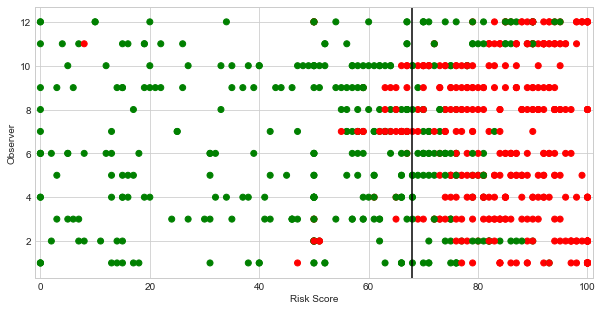

In [99]:
# Test plot of scenario 11
plt.rcParams['figure.figsize'] = [10, 5]
question = 11
y = risk.index.values + 1
colors = waitlist
colors[colors == 'Yes'] = 'green'
colors[colors == 'No'] = 'red'

for question in range(60):
    x = risk[question]
    x_mean = risk[question].mean()
    plt.scatter(x, y, marker='o', color=colors[question])
plt.axvline(x=risk.mean().mean(), color='black')
plt.xlim(-1, 101)
plt.ylabel('Observer')
plt.xlabel('Risk Score')
# risk.mean().mean()

In [90]:
## Change Yes/No to green/red, for use in the graphs

waitlist[waitlist == 'Yes'] = 'green'
waitlist[waitlist == 'No'] = 'red'
waitlist.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,green,red,green,green,red,green,red,green,green,red,...,red,green,red,red,red,green,red,green,green,red
1,green,red,green,green,red,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,red
2,green,red,green,green,green,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,red
3,green,red,green,green,red,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,green
4,green,red,green,green,red,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,green


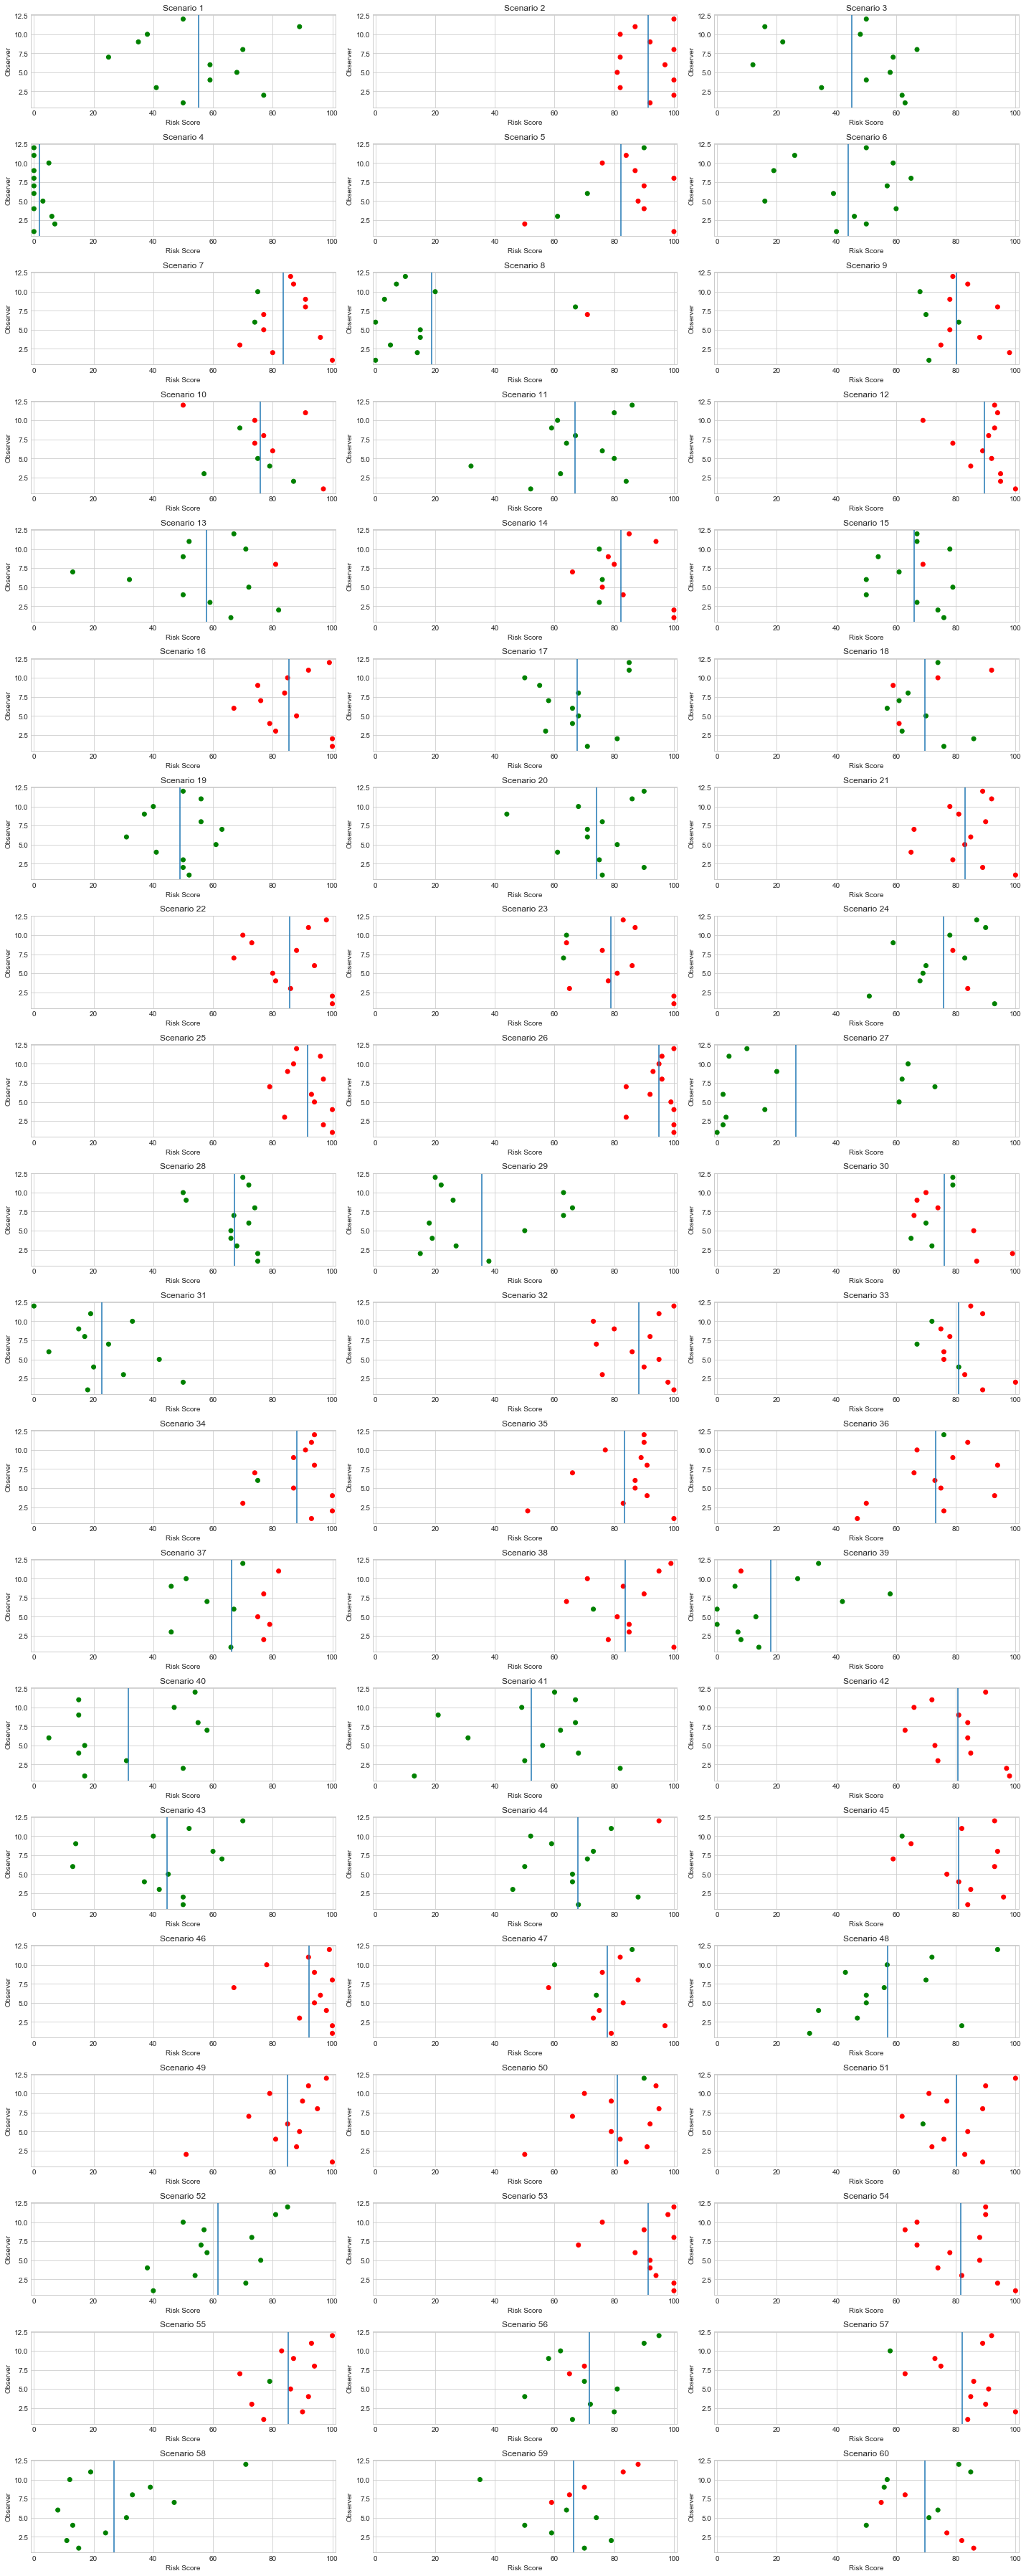

In [102]:
## Plot the results of each scenario plus their mean

plt.rcParams['figure.figsize'] = [20, 50]
fig, axs = plt.subplots(20, 3)
observer = risk.index.values + 1
colors = waitlist
colors[colors == 'Yes'] = 'green'
colors[colors == 'No'] = 'red'

question_number = 0

for i in range(20):
    for j in range(3):
        axs[i, j].set_xlim([-1, 101])
        axs[i, j].scatter(risk[question_number], observer, color=colors[question_number])
        axs[i, j].axvline(x=risk[question_number].mean())
        axs[i, j].set_title(f'Scenario {question_number + 1}')
        axs[i, j].set_ylabel('Observer')
        axs[i, j].set_xlabel('Risk Score')
        question_number += 1
        
plt.tight_layout()

In [107]:
xl = pd.ExcelFile('Survey questions key.xlsx')
survey_key = xl.parse("Sheet1")
survey_key.head()

,Scenario,Output Q No,SRTR Risk,Age,Diagnosis,Blood Group,BMI,PVR,Creat,Bili,Diab,LVAD,ECMO,Vent,Total No Of Risk Factors
0,1,7,15.51,0,0,0,1,0,0,0,1,1,0,0,3
1,2,8,26.40,1,0,0,1,0,1,1,0,0,0,1,5
2,3,9,7.36,0,0,0,0,0,1,0,0,0,0,0,1
3,4,10,4.01,0,0,0,0,0,0,0,0,0,0,0,0
4,5,11,3.67,0,0,0,0,1,0,0,0,0,0,0,1


In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,100))
print(scaler.fit(survey_key["SRTR Risk"]))

ValueError: Expected 2D array, got 1D array instead:
array=[15.51 26.4   7.36  4.01  3.67  6.56 15.79  5.31 16.87 12.96 21.83 26.39
 11.3  17.63 10.25 18.45 10.95 12.2   6.04  5.04 24.7  25.76 21.05 14.2
 25.88 20.26  4.47  9.94  4.66 11.96  4.55 15.4  17.9  21.56 25.78  4.2
  4.42 29.24  4.8   5.16  4.98 16.53  6.86 11.38 13.94 19.73 10.6  10.01
 25.88  7.8  20.47 11.44 26.39 21.6  25.28 12.7  17.46  6.41 15.68 11.27].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [110]:
survey_key['SRTR Risk'].reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [56]:
for i in range(30):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [61]:
## Total sum of squares = Sigma (yi - ymean)^2
tss_noscore = []
print('---------  With Score  ---------')
for scenario in range(30):
    x = risk[scenario]
    x_mean = risk[scenario].mean()
    tss_noscore.append(np.sum((x-x_mean)**2))
    print(f'TSS, Scenario {scenario + 1}:\t{tss_noscore[scenario]}')
    
print('-------  Without Score  --------')
tss_withscore = []
for scenario in range(30):
    x = risk[scenario+30]
    x_mean = risk[scenario+30].mean()
    tss_withscore.append(np.sum((x-x_mean)**2))
    print(f'TSS, Scenario {scenario + 31}:\t{tss_withscore[scenario]}')

---------  With Score  ---------
TSS, Scenario 1:	175.0
TSS, Scenario 2:	2366.0
TSS, Scenario 3:	3900.9166666666665
TSS, Scenario 4:	720.25
TSS, Scenario 5:	4079.666666666667
TSS, Scenario 6:	82.25
TSS, Scenario 7:	2526.25
TSS, Scenario 8:	2940.9166666666665
TSS, Scenario 9:	1028.9166666666667
TSS, Scenario 10:	6464.916666666666
TSS, Scenario 11:	958.6666666666665
TSS, Scenario 12:	1907.6666666666665
TSS, Scenario 13:	2652.9166666666665
TSS, Scenario 14:	774.9166666666667
TSS, Scenario 15:	4480.916666666667
TSS, Scenario 16:	1246.6666666666665
TSS, Scenario 17:	1170.0
TSS, Scenario 18:	1259.0
TSS, Scenario 19:	1475.0
TSS, Scenario 20:	1358.6666666666667
TSS, Scenario 21:	1062.9166666666665
TSS, Scenario 22:	1836.9166666666665
TSS, Scenario 23:	1152.9166666666667
TSS, Scenario 24:	1486.25
TSS, Scenario 25:	1926.9166666666665
TSS, Scenario 26:	1794.9166666666667
TSS, Scenario 27:	520.6666666666667
TSS, Scenario 28:	372.9166666666667
TSS, Scenario 29:	9404.916666666666
TSS, Scenario 30:	7

In [68]:
print(f'Total Sum of Squares Mean, No SRTR score:  {np.mean(tss_noscore)}')
print(f'Total Sum of Squares Min, No SRTR score:  {np.min(tss_noscore)}')
print(f'Total Sum of Squares Max, No SRTR score:  {np.max(tss_noscore)}')
print(f'Total Sum of Squares Mean, With SRTR score:  {np.mean(tss_withscore)}')
print(f'Total Sum of Squares Min, With SRTR score:  {np.min(tss_withscore)}')
print(f'Total Sum of Squares Max, With SRTR score:  {np.max(tss_withscore)}')

Total Sum of Squares Mean, No SRTR score:  2063.7499999999995
Total Sum of Squares Min, No SRTR score:  82.25
Total Sum of Squares Max, No SRTR score:  9404.916666666666
Total Sum of Squares Mean, With SRTR score:  2177.3888888888887
Total Sum of Squares Min, With SRTR score:  880.9166666666667
Total Sum of Squares Max, With SRTR score:  4721.666666666667


In [86]:
## Mean squared errors
mse_noscore = []
print('---------  With Score  ---------')
for scenario in range(30):
    x = risk[scenario]
    x_mean = risk[scenario].mean()
    mse_noscore.append((1/len(x))*np.sum((x-x_mean)**2))
    print(f'MSE, Scenario {scenario + 1}:\t{mse_noscore[scenario]}  (numerator: {np.sum((x-x_mean)**2)}, denominator: {len(x)})')
    
print('-------  Without Score  --------')
mse_withscore = []
for scenario in range(30):
    x = risk[scenario+30]
    x_mean = risk[scenario+30].mean()
    numerator = np.sum((x-x_mean)**2)
    denominator = len(x)
    mse_withscore.append(numerator/denominator)
    print(f'MSE, Scenario {scenario + 31}:\t{mse_withscore[scenario]}  (numerator: {np.sum((x-x_mean)**2)}, denominator: {len(x)})')

---------  With Score  ---------
MSE, Scenario 1:	14.583333333333332  (numerator: 175.0, denominator: 12)
MSE, Scenario 2:	197.16666666666666  (numerator: 2366.0, denominator: 12)
MSE, Scenario 3:	325.07638888888886  (numerator: 3900.9166666666665, denominator: 12)
MSE, Scenario 4:	60.02083333333333  (numerator: 720.25, denominator: 12)
MSE, Scenario 5:	339.97222222222223  (numerator: 4079.666666666667, denominator: 12)
MSE, Scenario 6:	6.854166666666666  (numerator: 82.25, denominator: 12)
MSE, Scenario 7:	210.52083333333331  (numerator: 2526.25, denominator: 12)
MSE, Scenario 8:	245.07638888888886  (numerator: 2940.9166666666665, denominator: 12)
MSE, Scenario 9:	85.74305555555556  (numerator: 1028.9166666666667, denominator: 12)
MSE, Scenario 10:	538.7430555555554  (numerator: 6464.916666666666, denominator: 12)
MSE, Scenario 11:	79.88888888888887  (numerator: 958.6666666666665, denominator: 12)
MSE, Scenario 12:	158.9722222222222  (numerator: 1907.6666666666665, denominator: 12)
MS

In [85]:
2652.9/np.sum((risk[13]-89.5833333333333)**2)

3.4234648886977097